# Plotting with pandas and matplotlib

At this point we are familiar with some of the features of pandas and explored some very basic data visualizations at the [end of Chapter 3](../../chapter-03/nb/03-temporal-data.ipynb). Now, we will wade into visualizing our data in more detail, starting by using the built-in plotting options available directly in pandas. Much like the case of pandas being built upon numpy, plotting in pandas takes advantage of plotting features from the `matplotlib` [^matplotlib] plotting library. Plotting in pandas provides a basic framework for quickly visualizing our data, but as you'll see we will need to also use features from matplotlib for more advanced formatting and to enhance our plots. In particular, we will use features from the the `pyplot` [^pyplot] module in matplotlib, which provides MATLAB-like [^matlab] plotting. We will also briefly explore creating interactive plots using the `pandas-bokeh` [^pandas_bokeh] plotting backend, which allows us to produce plots similar to those available in the `bokeh` plotting library [^bokeh] using plotting syntax similar to in pandas.

## Creating a basic x-y plot

The first step for creating a basic x-y plot is to import pandas and read in the data we want to plot from a file. We will be using a datetime index for our weather observation data as we [learned in Chapter 3](../../chapter-03/nb/03-temporal-data.ipynb). In this case, however, we'll include a few additional parameters in order to *read the data* with a datetime index. We will read in the data first, and then discuss what happened.

In [1]:
import pandas as pd
fp = 'data/029740.txt'

data = pd.read_csv(fp, delim_whitespace=True, 
                   na_values=['*', '**', '***', '****', '*****', '******'],
                   usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                   parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN')

So, let us now examing what is different here compared to files read in Chapter 3. There are two significant changes in the form of two new parameters: `parse_dates` and `index_col`.

- `parse_dates` takes a Python list of column name(s) for data file columns that contain date data and pandas will parse and convert data in these column(s) to the *datetime* data type. For many common date formats pandas will automatically recognize and convert the date data.
- `index_col` is used to state a column that should be used to index the data in the DataFrame. In this case, we end up with our date data as the DataFrame index. This is a very useful feature in pandas as we will see below.

Having read in the data file, we can now have a quick look at what we have using `data.head()`.

In [2]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


As mentioned above, you can now see that the index column for our DataFrame (the first column) contains date values related to each row in the DataFrame. With this we are already able to create our first plot using pandas. We will start by using the basic line plot in pandas to visualize at our temperature data.

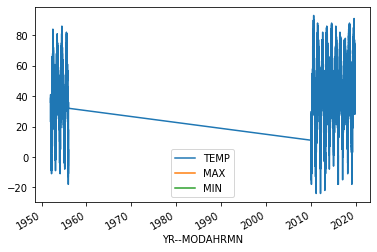

In [3]:
ax = data.plot()

Now, let's break down what just happened. First, we first created the plot object using the `plot()` method of the `data` DataFrame. Without any parameters given, this makes the plot of all columns in the DataFrame as lines of different color on the y-axis with the index, time in this case, on the x-axis. Second, in case we want to be able to modify the plot or add anything to it after the basic plot has been created, we assign the plot object to the variable `ax`. Why don't we check its data type below using the `type()` function.

In [4]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

OK, so this is a data type we have not seen previously, but clearly it is part of matplotlib. In case you were skeptical before, we now have evidence that pandas is using matplotlib for generating plots.

### Selecting plot data based on date

Now we can make a few small changes to our plot to further explore plotting with pandas. We can begin by plotting only the observed temperatures in the `data['TEMP']` column. In addition, we can restrict ourselves to observations from only the afternoon of October 1, 2019 (the last day in this dataset). We will do this by first creating a pandas series for only the desired data column and restricting the dateof interest. Once we have created the new pandas series we can plot the results.

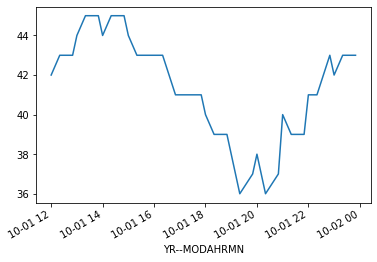

In [5]:
oct1_temps = data['TEMP'].loc[data.index >= '201910011200']
ax = oct1_temps.plot()

So, what did we change this time? First, we selected only the `'TEMP'` column from the `data` DataFrame by using `data['TEMP']` instead of `data`. Second, we added a restriction to the date range using `loc[]` to select only rows where the index value `data.index` is greater than `'201910011200'`. In that case, the number in the string is in the format `'YYYYMMDDHHMM'`, where `YYYY` is the year, `MM` is the month, `DD` is the day, `HH` is the hour, and `MM` is the minute. This will result in temperatures only from noon onwards on October 1, 2019. Finally, by saving this selection to the variable `oct1_temps` we're able to now use `oct1_temps.plot()` to plot only our selection. As you can see, we are able to easily control the values plotted in pandas, but we can do even better.

## Basic plot formatting

We can control the appearance of our plots, making them look nicer and provide more information by using a few additional plotting options available in pandas and/or matplotlib. Let's start by changing the line format, adding some axis labels, and adding a title.

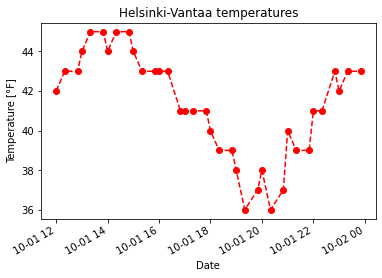

In [6]:
ax = oct1_temps.plot(style='ro--', title='Helsinki-Vantaa temperatures',
                     xlabel='Date', ylabel='Temperature [°F]')

Now we see that our temperature data as a red dashed line with circles indicating the temperature values from the data file. This comes from the additional parameter `style='ro--'`. In this case, `r` tells the `oct1_temps.plot()` function to use red color for the lines and symbols, `o` tells it to show circles at the data points, and `--` says to use a dashed line between points. You can use `help(oct1_temps.plot)` to find out more about formatting plots. We have also added a title using the `title` parameter, and axis labels using the `xlabel` and `ylabel` parameters [^axis_labels]. 

## Formatting the appearance of the figure

While the plot sizes we're working with are OK, it would be nice to have them displayed a bit larger. Fortunately, there is an easy way to make the plots larger in Jupyter notebooks. First, we need to import the `matplotlib pyplot library` [^pyplot], then we can make the default plot size larger by running the Python cell below.

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6]

The cell above sets the default plot size to be 12 inches wide by 6 inches tall. Adding text to plots can be done using `ax.text()`:

Text(201910011400, 38, 'This is my text.')

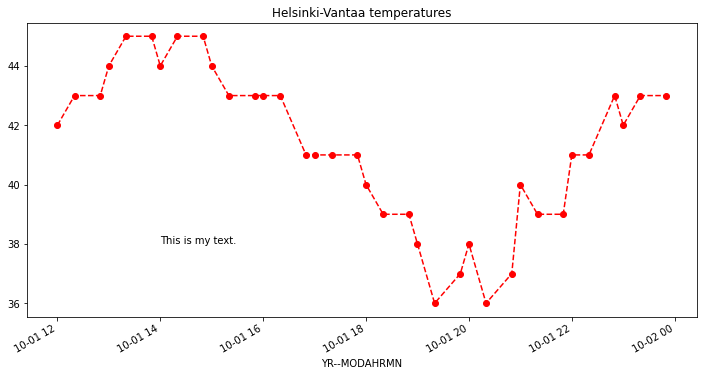

In [8]:
import datetime
ax = oct1_temps.plot(style='ro--', title='Helsinki-Vantaa temperatures')
x, y = '201910011400', 38
ax.text(x, y, 'This is my text.')

No we added "This is my text" at the location of *x*, *y* on the plot. Notice that we passed the `x` coordinate as a text following the formatting in the original data. It is also possible to to change the axis ranges. Changing the plot axes can be done using the `xlim` and `ylim` parameters of the `plot()` function, where the `xmin` should be the minimum bound of the x-axis, and the `xmax` should be the maximum bound, and the same goes for the y-axis with `ymin` and `ymax`. Next, we will take advantage of the `datetime` library to determine the time range for the x-axis, as it is easier to read and understand than having a long text:

<AxesSubplot:xlabel='YR--MODAHRMN'>

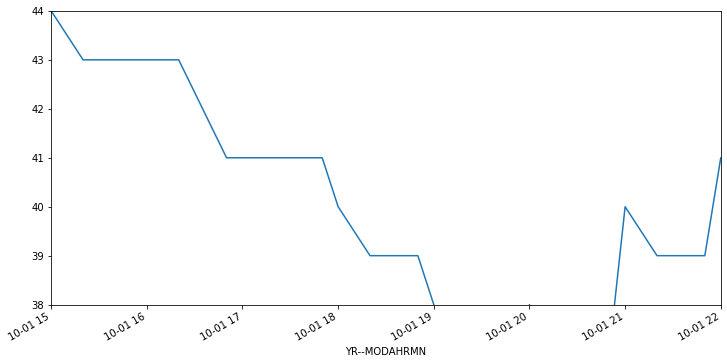

In [9]:
from datetime import datetime

xmin, xmax = datetime(2019, 10, 1, 15), datetime(2019, 10, 1, 22) 
ymin, ymax = 38, 44
oct1_temps.plot(xlim=[xmin, xmax], ylim=[ymin, ymax])

As we can see, now we "zoomed" our plot based on the x and y axis-ranges that we defined. Notice that the underlying data did not disappear anywhere, we just specified which parts of the plot we want to show in the figure. 

## Dealing with datetime axes

One issue we will encounter with both placing text on the plot and changing the axis ranges is our datetime index for our DataFrame. In order to do either thing, we need to define x-values using a datetime object. The easiest way to do this is to use the pandas `pd.to_datetime()` function, which converts a character string date to a datetime object. For example, we can convert 13:00 on October 1, 2019 from the character string `'201910011300'` to a datetime equivalent by typing

In [10]:
pd.to_datetime('201910011300')

Timestamp('2019-10-01 13:00:00')

With this datetime issue in mind, let's now consider a modified version of the plot above, we can

1. Limit our time range to 12:00 to 15:00 on October 1, 2019
2. Only look at temperatures between 40-46° Fahrenheit
3. Add text to note the coldest part of the early afternoon.

Text(2019-10-01 12:05:00, 42.0, '<- Coldest temperature in early afternoon')

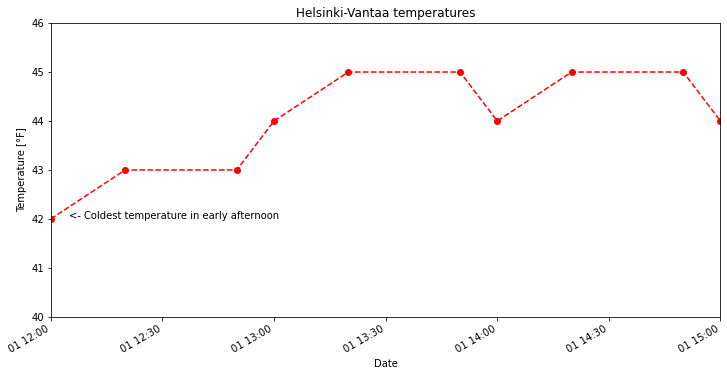

In [11]:
start_time = pd.to_datetime('201910011200')
end_time = pd.to_datetime('201910011500')
cold_time = pd.to_datetime('201910011205')

ax = oct1_temps.plot(style='ro--', title='Helsinki-Vantaa temperatures',
                     xlim=[start_time, end_time], ylim=[40.0, 46.0])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(cold_time, 42.0, '<- Coldest temperature in early afternoon')

**Check your understanding (online)**

Create a line plot similar to our examples above with the following attributes:
    
- Temperature data from 18:00-24:00 on October 1, 2019
- A dotted black line connecting the observations (do not show the data points)
- A title that reads "Evening temperatures on October 1, Helsinki-Vantaa"
- A text label indicating the warmest temperature in the evening

In [12]:
# Define start, end, and cold times


## Bar plots in pandas

In addition to line plots, there are many other options for plotting in pandas.
Bar plots are one option, which can be used quite similarly to line plots with the addition of the `kind=bar` parameter.
Note that it is easiest to plot our selected time range for a bar plot by selecting the dates in our data series first, rather than adjusting the plot limits. Pandas sees bar plot data as categorical, so the date range is more difficult to define for x-axis limits. For the y-axis, we can still define its range using the `ylim=[ymin, ymax]` parameter. Similarly, text placement on a bar plot is more difficult, and most easily done using the index value of the bar where the text should be placed.

Text(0, 42.1, 'Coldest \ntemp \nv')

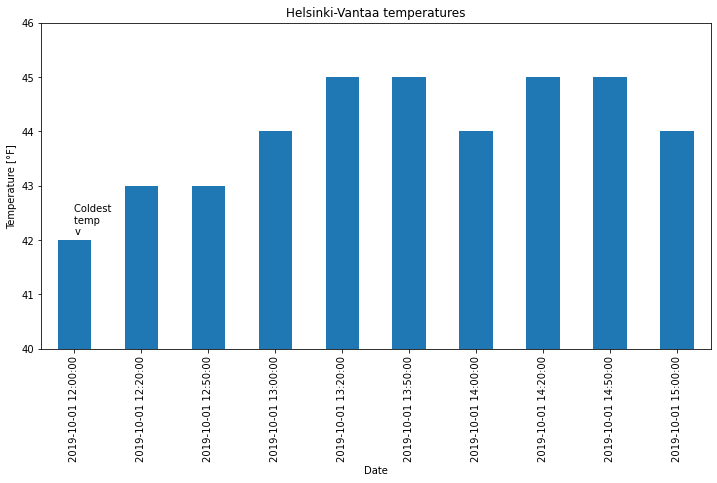

In [13]:
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= '201910011500']
ax = oct1_afternoon.plot(kind='bar', title='Helsinki-Vantaa temperatures',
                         ylim=[40, 46])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(0, 42.1, 'Coldest \ntemp \nv')

You can find more about how to format bar charts on the [pandas documentation website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

## Saving your plots as image files

Saving plots created using pandas can be done in several ways.
The recommendation for use outside of Jupyter notebooks is to use Matplotlib's `plt.savefig()` function.
When using `plt.savefig()`, you simply give a list of commands to generate a plot and include `plt.savefig()` with some parameters as the last command in the Python cell.
The file name is required, and the image format will be determined based on the listed file extension.

Matplotlib plots can be saved in a number of useful file formats, including PNG, PDF, and EPS.
PNG is a nice format for raster images, and EPS is probably easiest to use for vector graphics.
Let's check out an example and save our lovely bar plot.

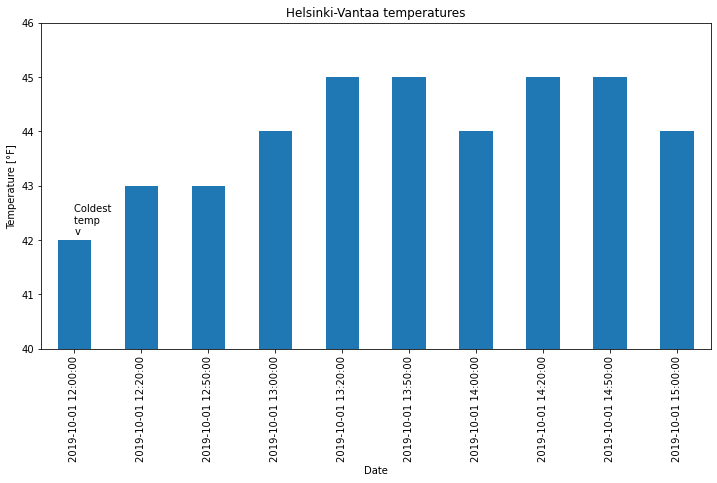

In [14]:
ax = oct1_afternoon.plot(kind='bar', title='Helsinki-Vantaa temperatures',
                         ylim=[40, 46])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(0, 42.1, 'Coldest \ntemp \nv')

plt.savefig('bar-plot.png')

If you refresh your **Files** tab on the left side of the JupyterLab window you should now see `bar-plot.png` listed.
We could try to save another version in higher resolution with a minor change to our plot commands above.

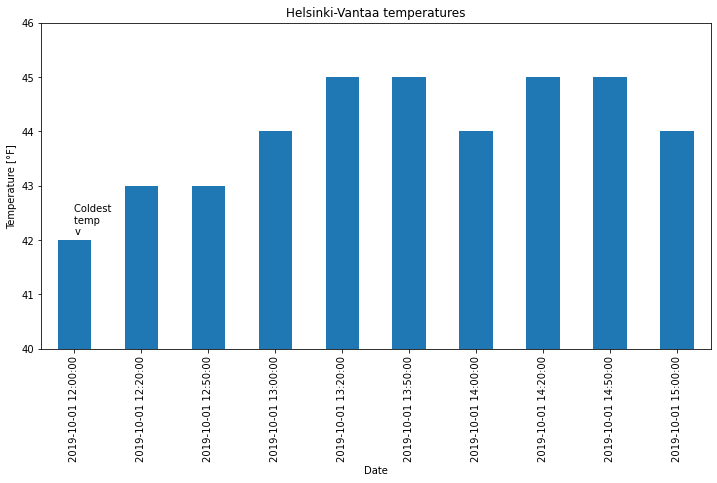

In [15]:
ax = oct1_afternoon.plot(kind='bar', title='Helsinki-Vantaa temperatures',
                         ylim=[40, 46])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(0, 42.1, 'Coldest \ntemp \nv')

plt.savefig('bar-plot-hi-res.pdf', dpi=600)

## Interactive plotting with pandas-bokeh

When using Jupyter Notebooks, we don't need to stick to static visualizations. We can easily create plots that are interactive, allowing us to view data values by mousing over them, or click to enable/disable plotting of some data. There are several ways we can do this, but we'll utilize the [pandas-bokeh plotting backend](https://github.com/PatrikHlobil/Pandas-Bokeh) [^pandas_bokeh], which allows us to create interactive plots with little additional effort.

To get started, we need to import pandas-bokeh and make some configurations:

1. We want to change the settings so that output will be displayed on this page rather than in a separate window
2. we set pandas plotting backend to use pandas-bokeh rather than matplotlib for plotting

In [16]:
import pandas_bokeh

pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

Now, we can consider an example plot similar to the one we started with, but with data for three days (September 29-October 1, 2019). Pandas-bokeh expects a DataFrame as the source for the plot data, so we'll need to create a time slice of the `data` DataFrame containing the desired date range before making the plot. Let's generate the pandas-bokeh plot and the see what is different.

In [17]:
sept29_oct1_df = data.loc[data.index >= '201909290000']

start_time = pd.to_datetime('201909290000')
end_time = pd.to_datetime('201910020000')

ax = sept29_oct1_df.plot(title='Helsinki-Vantaa temperatures',
                         xlabel='Date', ylabel='Temperature [°F]',
                         xlim=[start_time, end_time], ylim=[35.0, 60.0])

So now we have a similar plot to those generated previously, but when you move the mouse along the curve you can see the temperature values at each time. We can also hide any of the lines by clicking on them in the legend, as well as use the scroll wheel/trackpad to zoom.

But we did also have to make a few small changes to generate this plot:

1. We need to use a DataFrame as the data source for the plot, rather than a pandas Series. Thus, `data['TEMP'].plot()` will not work with pandas-bokeh.
2. The x- and y-axis labels are specified using the `xlabel` and `ylabel` parameters, rather than using `ax.set_xlabel()` or `ax.set_ylabel()`.
3. The line color and plotting of points are not specified using the `style` keyword. Instead, the line colors could be specified using the `color` or `colormap` parameters. Plotting of the points is enabled using the `plot_data_points` parameter (see below). More information about formatting the lines can be found on the [pandas-bokeh website](https://github.com/PatrikHlobil/Pandas-Bokeh) [^pandas_bokeh].
4. We have not included a text label on the plot, as it may not be possible to do so with pandas-bokeh.

But otherwise, we are able to produce these cool interactive plots with minimal effort, and directly within our notebooks!

In [18]:
ax = sept29_oct1_df.plot(title='Helsinki-Vantaa temperatures',
                         xlabel='Date', ylabel='Temperature [°F]',
                         xlim=[start_time, end_time], ylim=[35.0, 60.0],
                         plot_data_points=True)

## Exercises

Add exercises.

## Footnotes

[^matplotlib]: <https://matplotlib.org/>
[^pyplot]: <https://matplotlib.org/api/pyplot_api.html>
[^matlab]: <https://www.mathworks.com/products/matlab.html>
[^pandas_bokeh]: <https://github.com/PatrikHlobil/Pandas-Bokeh>
[^bokeh]: <https://docs.bokeh.org/en/latest/index.html>
[^axis_labels]: Axis labels are a relatively new feature in pandas plotting, added in version 1.1.0. If you are using an older version of pandas and do not want upgrade then you will need to use a separate command such as `ax.set_xlabel('Date')` to set the axis labels.